# 1. Pobieranie danych

Dane sa pobierane z biblioteki seaborn https://github.com/mwaskom/seaborn-data, dotycza pingwinow.

Pingwin(gatunek, wyspa, dlugosc dzioba, glebokosc dzioba, dlugosc pletwy, waga, plec)

In [1]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_of_data = load_dataset('penguins')
all_of_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Moje dane skladaja sie z 344 wierszy i 7 kolumn wymienionych wyzej. Niektore rekordy maja wartosc nan.
Postanowilem je usunac.

In [3]:
all_of_data = all_of_data.dropna()
all_of_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Zostalo mi 333 wiersze po usunieciu wszystkich danych ktore zawieraly wiersze nan, z tymi danymi bede pracowac

# 2. Przedstawienie danych na wykresach

### Ile jest pingwinow danego gatunku

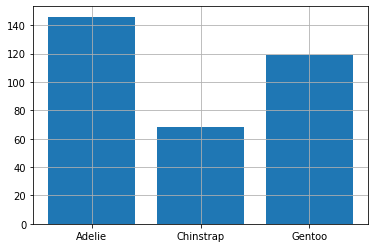

In [4]:
species = all_of_data['species'].unique()
population_of_specie = [all_of_data[all_of_data['species']==x]['species'].count() for x in species]

plt.bar(species,population_of_specie)
plt.grid()
plt.show()

### Histogram pokazujacy ile pingwinow ma dlugosc pletwy o wartosci x

In [5]:
import plotly.express as px
fig = px.histogram(all_of_data, x="bill_length_mm",nbins=50)
fig.show()

### Histogram pokazujacy ile pingwinow ma wage o wartosci x

In [6]:
fig = px.histogram(all_of_data, x="body_mass_g",nbins=60)
fig.show()

### histogram pokazujacy ile pingwinow obu plci maja wartosc wagi z osi x

In [74]:
# Samice
fig = px.histogram(all_of_data[all_of_data['sex']=='Female'], x="body_mass_g",nbins=60)
fig.show()

In [75]:
#Samce
fig = px.histogram(all_of_data[all_of_data['sex']=='Male'], x="body_mass_g",nbins=60)
fig.show()

Widać wyraznie ze jesli podzielimy wage pingwinow ze wzgledu na plec wylaniaja sie klastry zarowno dla samcow i samic,
mozna po tym wstepnie stwiedzic ze rozklad wagi pingwinow nie jest normalny, temat zostanie rozwiniety w pozniejszej analizie

### Wykres dlugosci pletwy od wagi pingwina 

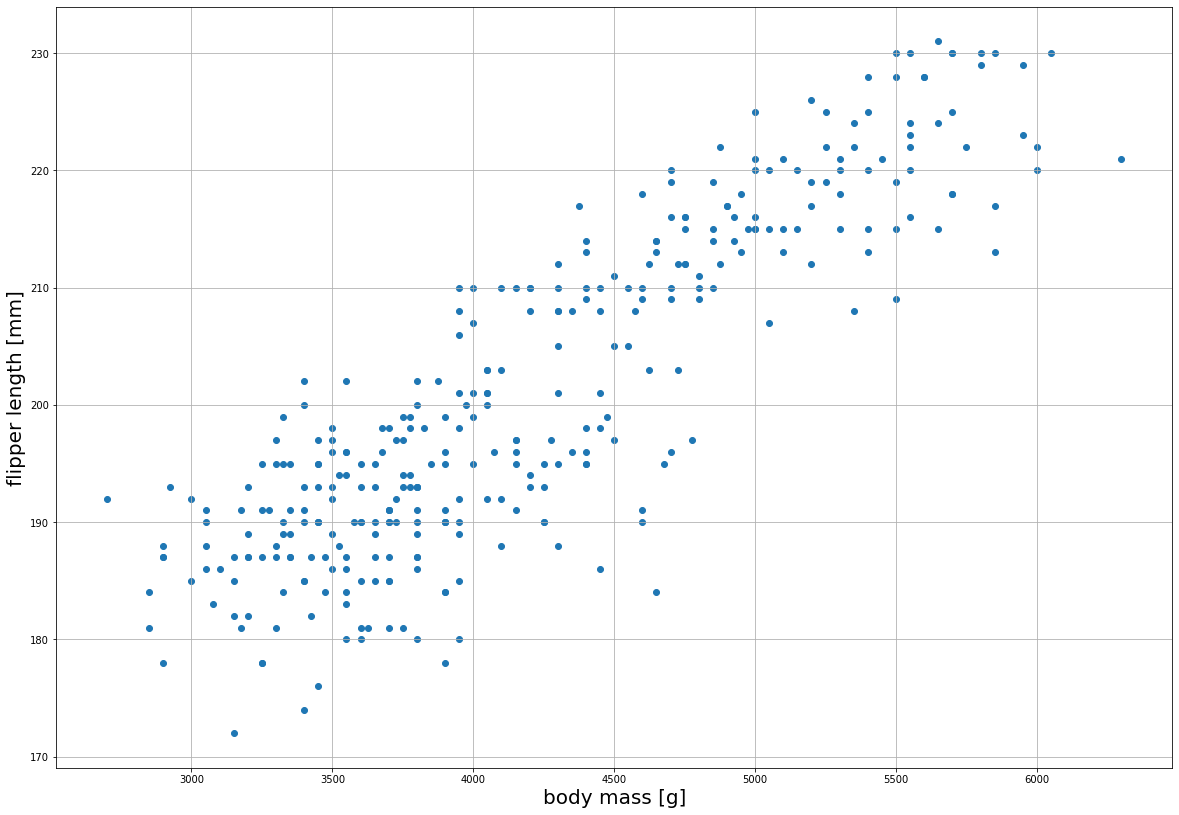

In [49]:
X=all_of_data['body_mass_g']
Y=all_of_data['flipper_length_mm']
plt.figure(figsize=(20,14))
plt.scatter(X,Y)
plt.xlabel('body mass [g]',fontsize=20)
plt.ylabel('flipper length [mm]',fontsize=20)
plt.grid()
plt.show()

Da sie zauwazyc, ze zaleznosc moze byc liniowa, dlatego zainteresujemy sie tym bardziej w dalszej czesci analizy

### Wykres dlugosci pletwy od glebokosci dzioba

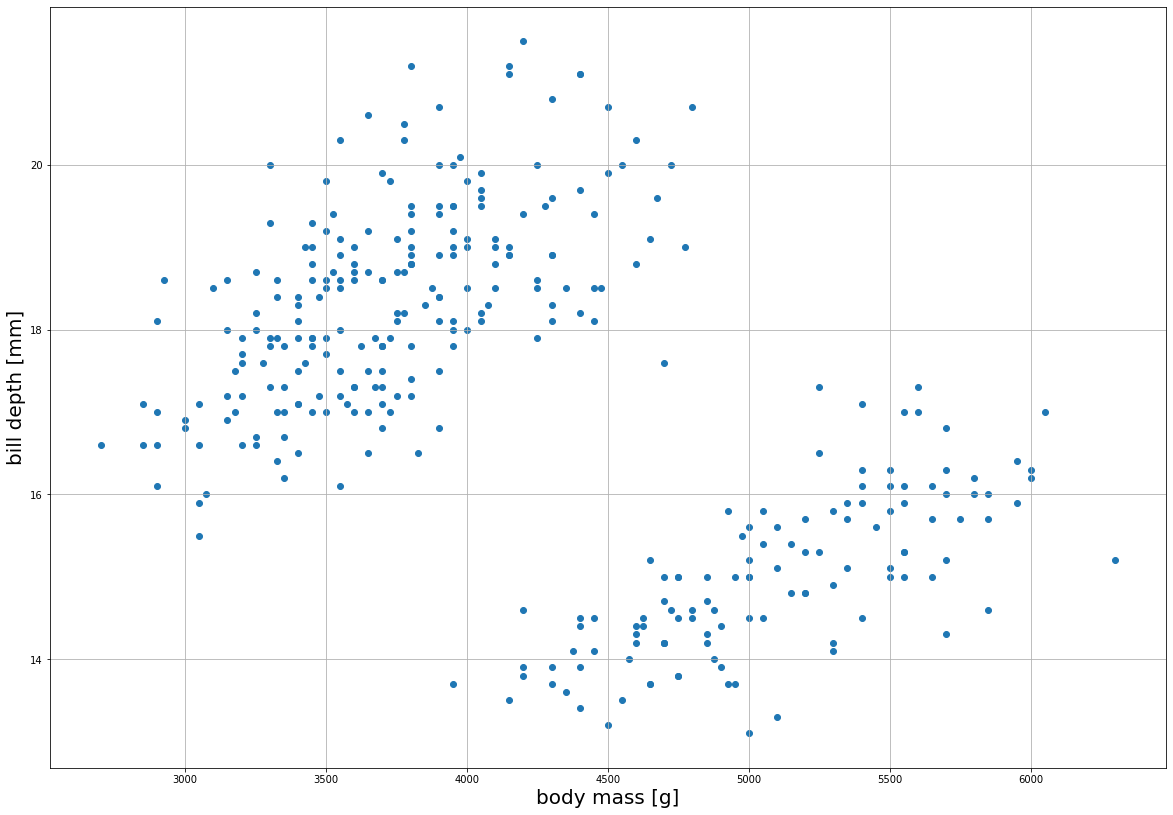

In [50]:
X=all_of_data['body_mass_g']
Y=all_of_data['bill_depth_mm']
plt.figure(figsize=(20,14))
plt.scatter(X,Y)
plt.xlabel('body mass [g]',fontsize=20)
plt.ylabel('bill depth [mm]',fontsize=20)
plt.grid()
plt.show()

Widzimy tutaj znowu dwie klastry na wykresie

# 3. Modele dopasowane metoda analityczna

Po wstepnym zwizualizowaniu wykresow mozemy zajac sie tworzeniem modeli. Wybralem do tego zadania wykres zaleznosci miedzy 
dlugoscia pletwy pingwina od jego wagi.

### Model liniowy bez podzialu na dane testowe i sprawdzajace

Parametry $a$ przechowywane są w polu klasy o nazwie *`coef_`* a skalarny parametr swobodny (bo nie związany z żadnym wejściem) $b$ w polu *`intercept_`*.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [52]:
X = np.asarray(all_of_data['flipper_length_mm'], dtype='float64')
Y = np.asarray(all_of_data['body_mass_g'], dtype='float64')

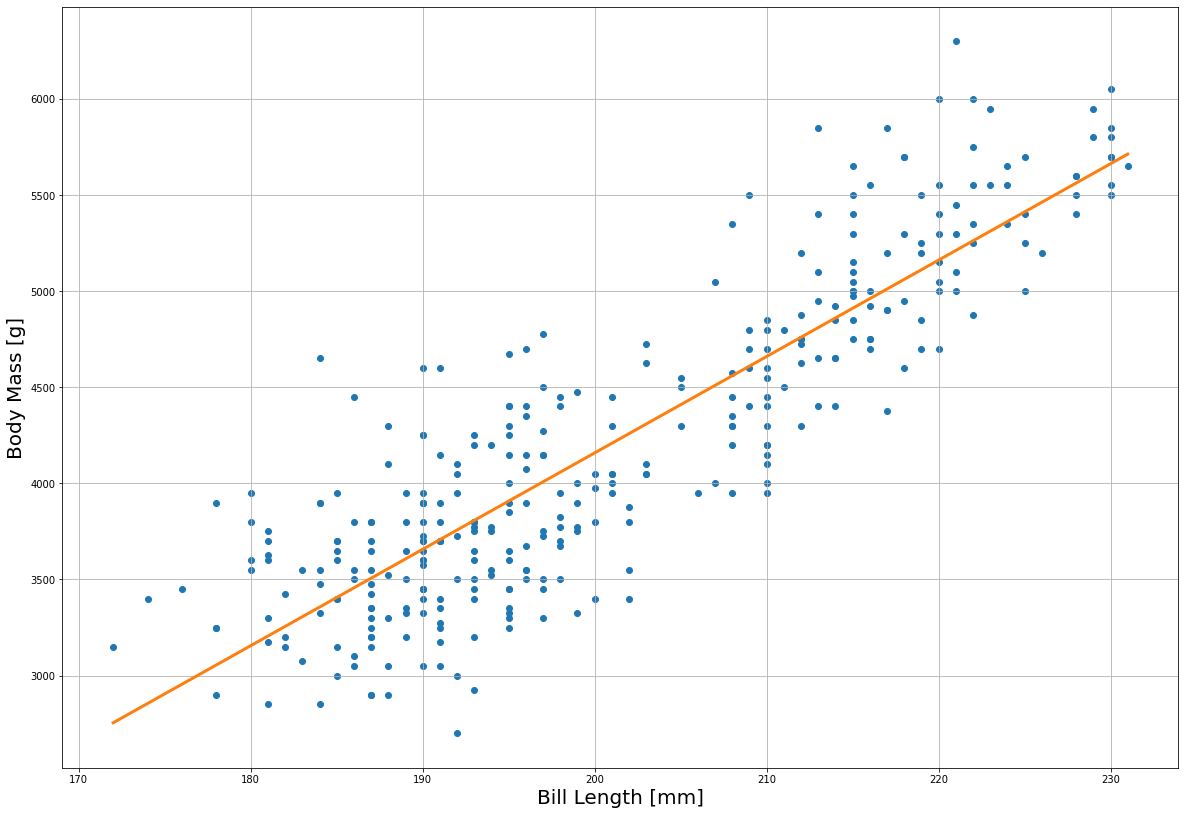

In [53]:
model_lin= LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_LIN_pred = model_lin.predict(os_x.reshape(-1,1))
plt.figure(figsize=(20,14))
plt.scatter(X,Y)
plt.plot(os_x, y_LIN_pred, color='tab:orange', linewidth=3)
plt.xlabel('Bill Length [mm]',fontsize=20)
plt.ylabel('Body Mass [g]',fontsize=20)

plt.grid()
plt.show()

Wzor ogolny regresji liniowej 

In [54]:
print(f'y={np.round(model_lin.coef_,5)[0]}x+({np.round(model_lin.intercept_,5)})')

y=50.15327x+(-5872.09268)


Wskaznik jakosci modelu mierzony bledem sredniokwadratowym

In [55]:
MSE_LIN_WITHOUT_TEST = np.round(mean_squared_error(Y, model_lin.predict(X.reshape(-1,1))),4)
print("Blad srednio-kwadratowy="+str(MSE_LIN_WITHOUT_TEST) )

Blad srednio-kwadratowy=153789.6779


### Model kwadratowy bez podzialu na dane testowe i sprawdzajace

In [56]:
from sklearn.preprocessing import PolynomialFeatures

model_GLM = LinearRegression()

gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X.reshape(-1,1)), Y)

a = np.round(model_GLM.coef_[2],4)
b = np.round(model_GLM.coef_[1],4)
c = np.round(model_GLM.intercept_,4)

os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

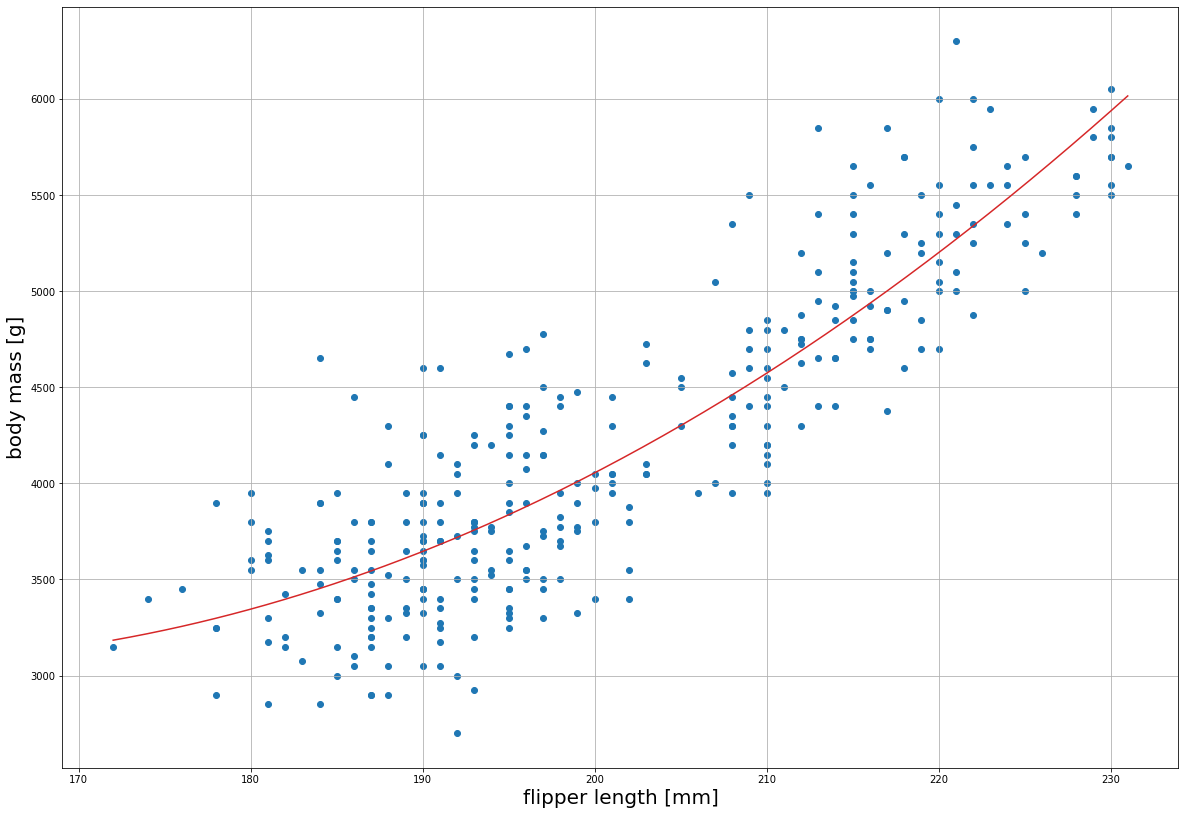

In [57]:
plt.figure(figsize=(20,14))
plt.scatter(X, Y)


plt.plot(os_x, y_GLM_pred, color='tab:red')


plt.xlabel(xlabel='flipper length [mm]',fontsize=20)
plt.ylabel(ylabel='body mass [g]',fontsize=20)

plt.grid()
plt.show()

wzor ogolny modelu w postaci funkcji kwadratowej

In [58]:
print(f'y=({a})x^2 + ({b})x + ({c})')

y=(0.5449)x^2 + (-171.614)x + (16579.8692)


Wskaznik jakosci modelu mierzony bledem sredniokwadratowym

In [59]:
MSE_GLM_WITHOUT_TEST = np.round(mean_squared_error(Y, model_GLM.predict(gen_features.fit_transform(X.reshape(-1,1)))),4)
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM_WITHOUT_TEST}')

Błąd średniokwadratowy modelu GLM: 143462.2075


### Podsumowanie modeli bez podzialu danych

Jak widac oba modele dosc dobrze przedstawiaja zaleznosc miedzy zmiennymi, bledy sredniokwadratowe sa zblizone, kwadratowy model wydaje sie miec w tym wypadku mniejszy blad sredniokwadratowy co moze oznaczac ze lepiej opsiuje te zaleznosc. Idac dalej zobaczymy czy sprawdzi sie to przy podzialach na dane testowe i sprawdzajace

In [60]:
print(MSE_LIN_WITHOUT_TEST,MSE_GLM_WITHOUT_TEST)
print(MSE_LIN_WITHOUT_TEST - MSE_GLM_WITHOUT_TEST)

153789.6779 143462.2075
10327.47040000002


### Model liniowy z podzialem trenujace=80% sprawdzajace=20%

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,train_size=0.8)

In [62]:
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1),Y_train)

a=np.round(model_lin.coef_,5)[0]
b=np.round(model_lin.intercept_,5)

print(f'Parametry modelu liniowego: a={a}, b={b}')
MSE_LIN_TEST_80 = np.round(mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1))),4)

print(f'Błąd średniokwadratowy modelu liniowego: {MSE_LIN_TEST_80}')

Parametry modelu liniowego: a=50.40508, b=-5936.18671
Błąd średniokwadratowy modelu liniowego: 159173.8344


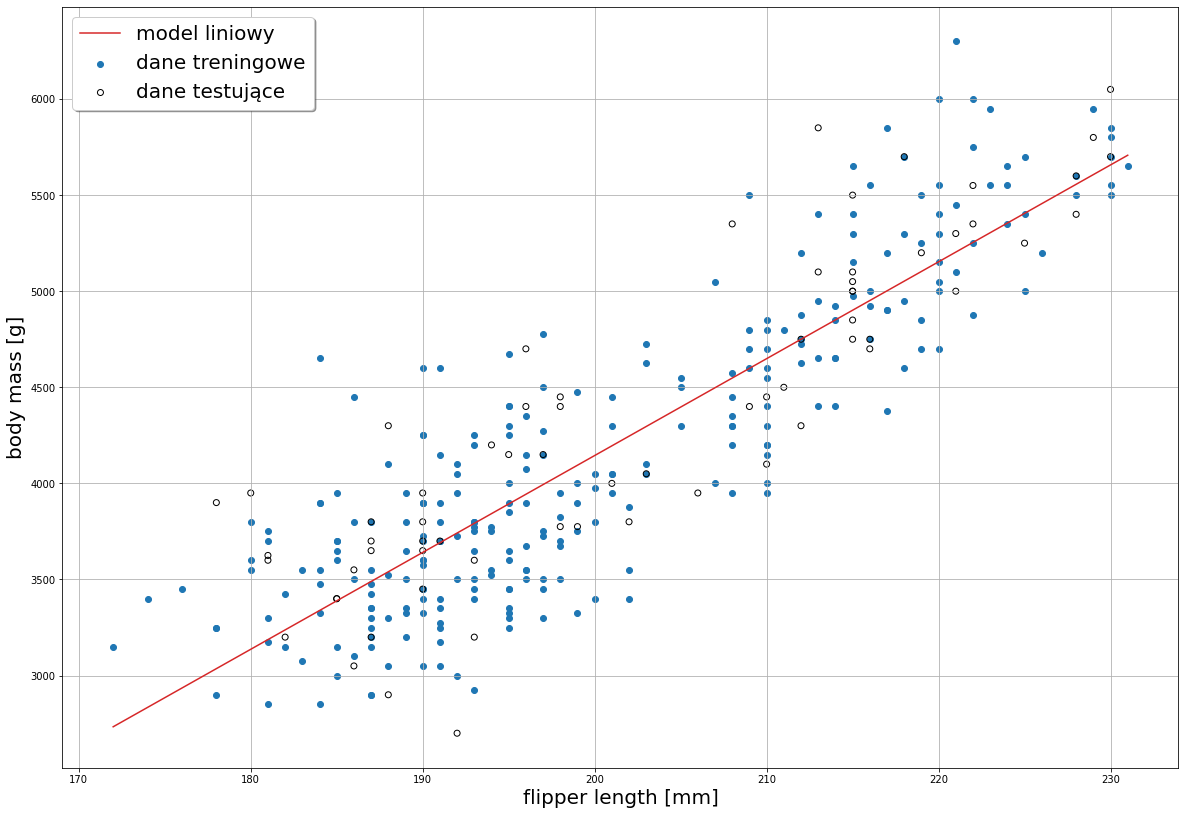

In [63]:
plt.figure(figsize=(20,14))
plt.scatter(X_train, Y_train, label='dane treningowe')
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')

y_LIN_pred_test_80 = model_lin.predict(os_x.reshape(-1,1))

plt.plot(os_x,y_LIN_pred_test_80 , label='model liniowy', color='tab:red')

plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xlabel(xlabel='flipper length [mm]',fontsize=20)
plt.ylabel(ylabel='body mass [g]',fontsize=20)

plt.grid()
plt.show()

Postac ogolna modelu liniowego z podzialem na dane testowe

In [64]:
print(f'y={a}x+({b})')

y=50.40508x+(-5936.18671)


### Model kwadratowy z podzialem trenujace=80% sprawdzajace=20%

In [65]:
from sklearn.preprocessing import PolynomialFeatures

model_GLM = LinearRegression()

gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)
a = np.round(model_GLM.coef_[2],4)
b = np.round(model_GLM.coef_[1],4)
c = np.round(model_GLM.intercept_,4)


print(f'Parametry modelu GLM: a={a},b={b},c={c}')
MSE_GLM_TEST_80 = np.round(mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1)))),4)
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM_TEST_80}')

Parametry modelu GLM: a=0.5594,b=-177.0119,c=17066.8027
Błąd średniokwadratowy modelu GLM: 150368.5473


Postac ogolna modelu kwadratowego z podzialem

In [66]:
print(f'y=({a})x^2 + ({b})x + ({c})')

y=(0.5594)x^2 + (-177.0119)x + (17066.8027)


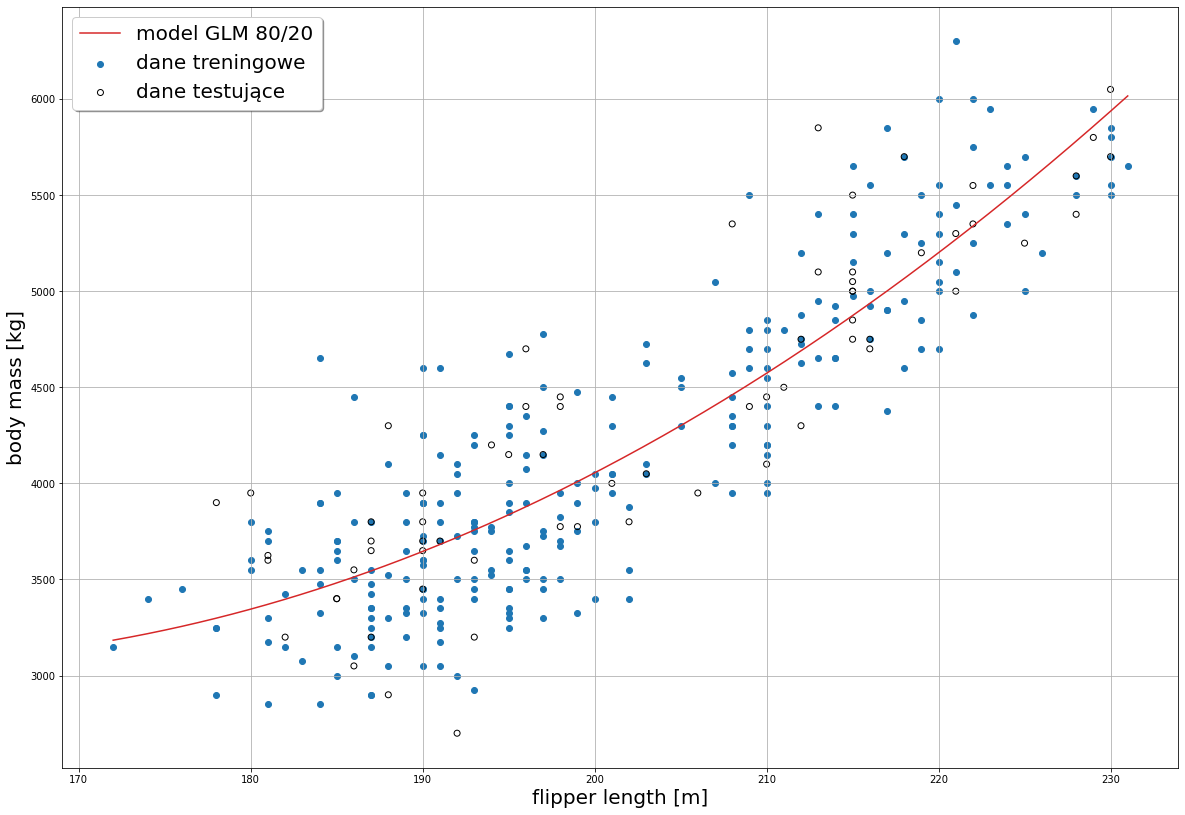

In [67]:
y_GLM_pred_80 = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
plt.figure(figsize=(20,14))
plt.scatter(X_train, Y_train, label='dane treningowe')
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')

plt.plot(os_x, y_GLM_pred, label='model GLM 80/20', color='tab:red')

plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xlabel(xlabel='flipper length [m]',fontsize=20)
plt.ylabel(ylabel='body mass [kg]',fontsize=20)

plt.grid()
plt.show()

### Podsumowanie modeli z podzialem na dane testowe i sprawdzajace

Bledy sredniokwadratowe sa zalezne bardzo od wylosowanego zbioru danych testowych i treningowych, kwadratowy model w tym przypadku rowniez mniejszy blad sredniokwadratowy co moze oznaczac ze lepiej opsiuje te zaleznosc. 

`Po wielu probach blad jest mniejszy przy modelu kwadratowym w obu przypadkch, lepiej opisujac te zaleznosc

In [68]:
print(f"Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: {MSE_LIN_WITHOUT_TEST}")
print(f"Blad sredniokwadratowy funkcji kwadratowej bez podzialu na dane testowe i treningowe: {MSE_GLM_WITHOUT_TEST}")
print(f"Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: {MSE_LIN_TEST_80}")
print(f"Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: {MSE_GLM_TEST_80}")

Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: 153789.6779
Blad sredniokwadratowy funkcji kwadratowej bez podzialu na dane testowe i treningowe: 143462.2075
Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: 159173.8344
Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: 150368.5473


# 4. Modele dopasowane metoda optymalizacji 

In [29]:
from scipy import optimize

Nasza funkcja celu jest funkcja bledu sredniokwadratowego, poniewaz to go bedziemy chcieli minimalizowac

In [30]:
def Fcelu(x):
    x1,x0 = x       
    
    return mean_squared_error(Y,x1*X+x0)

### Definiowanie zbiorow poczatkowych dla 3 eksperymentow

In [71]:
x_pocz_1 = np.random.normal(scale=10, size=2)
x_pocz_2 = np.random.normal(scale=1000, size=2)
x_pocz_3 = np.random.normal(scale=10000, size=2)
x_pocz_1,x_pocz_2,x_pocz_3

(array([-5.06705632, -4.67447791]),
 array([ 709.68236298, -509.05057809]),
 array([-10523.6725211 ,  -2869.01395869]))

### exp1

In [72]:
x_opt_1, x_historia_1 = optimize.fmin(Fcelu, x_pocz_1, retall=True)
MSE_OPT_1 = Fcelu(x_opt_1)
print(f'Optimum jest w punkcie {x_opt_1}\nWartość funkcji celu w optimum to {MSE_OPT_1:f}')

Optimization terminated successfully.
         Current function value: 153789.677867
         Iterations: 105
         Function evaluations: 202
Optimum jest w punkcie [   50.15326547 -5872.09258179]
Wartość funkcji celu w optimum to 153789.677867


Przyklad modelu (w pozostalych eksperymentach podobnie):

In [73]:
print(f'y={x_opt_1[0]}x+({x_opt_1[1]})') 

y=50.15326547374518x+(-5872.092581794779)


### exp2

In [34]:
x_opt_2, x_historia_2 = optimize.fmin(Fcelu, x_pocz_2, retall=True)
MSE_OPT_2 = Fcelu(x_opt_2)
print(f'Optimum jest w punkcie {x_opt_2}\nWartość funkcji celu w optimum to {MSE_OPT_2:f}')

Optimization terminated successfully.
         Current function value: 153789.677867
         Iterations: 105
         Function evaluations: 199
Optimum jest w punkcie [   50.15326587 -5872.0926698 ]
Wartość funkcji celu w optimum to 153789.677867


### exp3

In [35]:
x_opt_3, x_historia_3 = optimize.fmin(Fcelu, x_pocz_3, retall=True)
MSE_OPT_3 = Fcelu(x_opt_3)
print(f'Optimum jest w punkcie {x_opt_3}\nWartość funkcji celu w optimum to {MSE_OPT_3:f}')

Optimization terminated successfully.
         Current function value: 153789.677867
         Iterations: 93
         Function evaluations: 178
Optimum jest w punkcie [   50.15326617 -5872.09272964]
Wartość funkcji celu w optimum to 153789.677867


### Wizualizacja poszukiwan

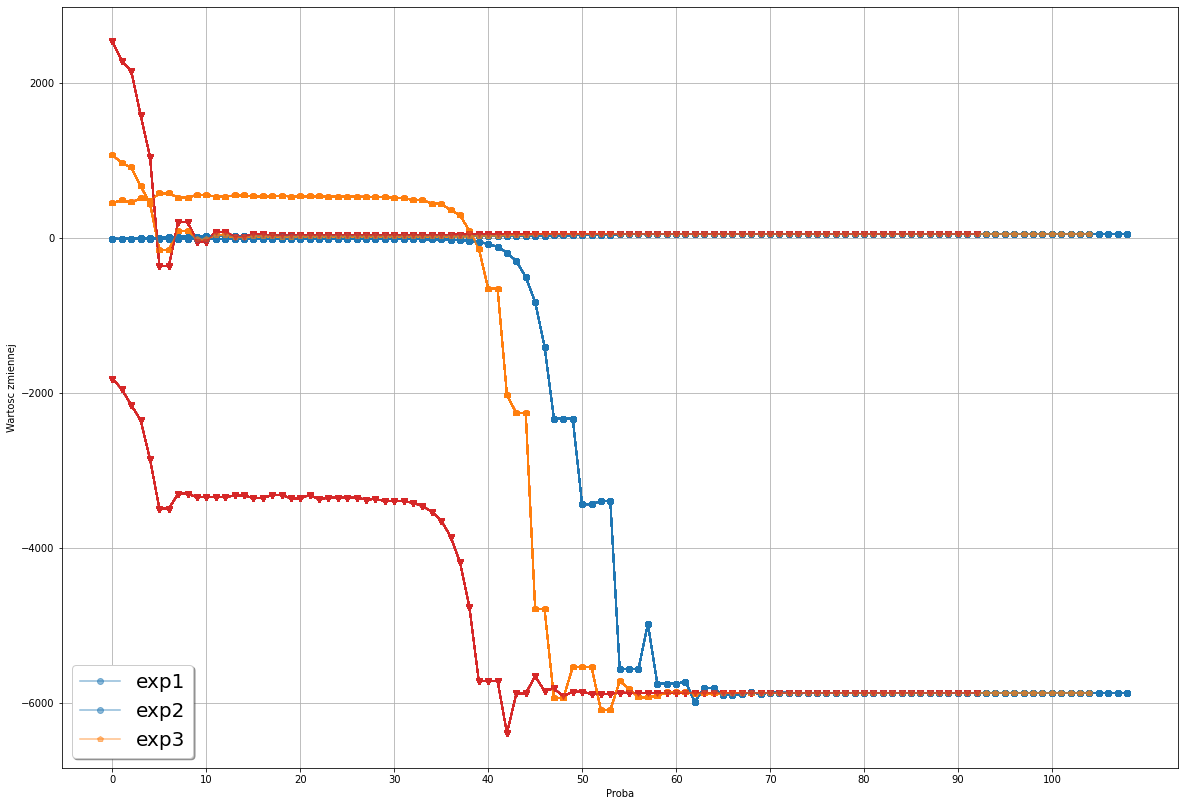

In [36]:
plt.figure(figsize=(20,14))
for _ in range(100):

  h1=plt.plot(x_historia_1, 'o-',color='tab:blue', alpha=0.5, scaley=True,label='exp 1')

  h2=plt.plot(x_historia_2, 'p-',color='tab:orange', alpha=0.5,label='exp 2')

  h3=plt.plot(x_historia_3, 'v-',color='tab:red', alpha=0.5,label='exp 3')
    
plt.legend(['exp1','exp2','exp3'] ,fontsize=20, shadow=True, loc='lower left')
plt.xticks(np.arange(0,len(x_historia_1),10))
plt.xlabel('Proba')
plt.ylabel('Wartosc zmiennej')
plt.grid()
plt.show()

### Wizualizacja na wykresie z punktami

In [37]:
def showRegressionLine(x_opt,title):
    a,b = x_opt
    Y_pred = [a*x+b for x in X]
    plt.figure(figsize=(20,14))
    plt.scatter(X,Y)

    plt.title(title, fontsize=20)
    plt.plot(X, Y_pred, color='tab:orange', linewidth=3)
    plt.xlabel('Bill Length [m]',fontsize = 20)
    plt.ylabel('Body Mass [kg]',fontsize = 20)

    plt.grid()
    plt.show()

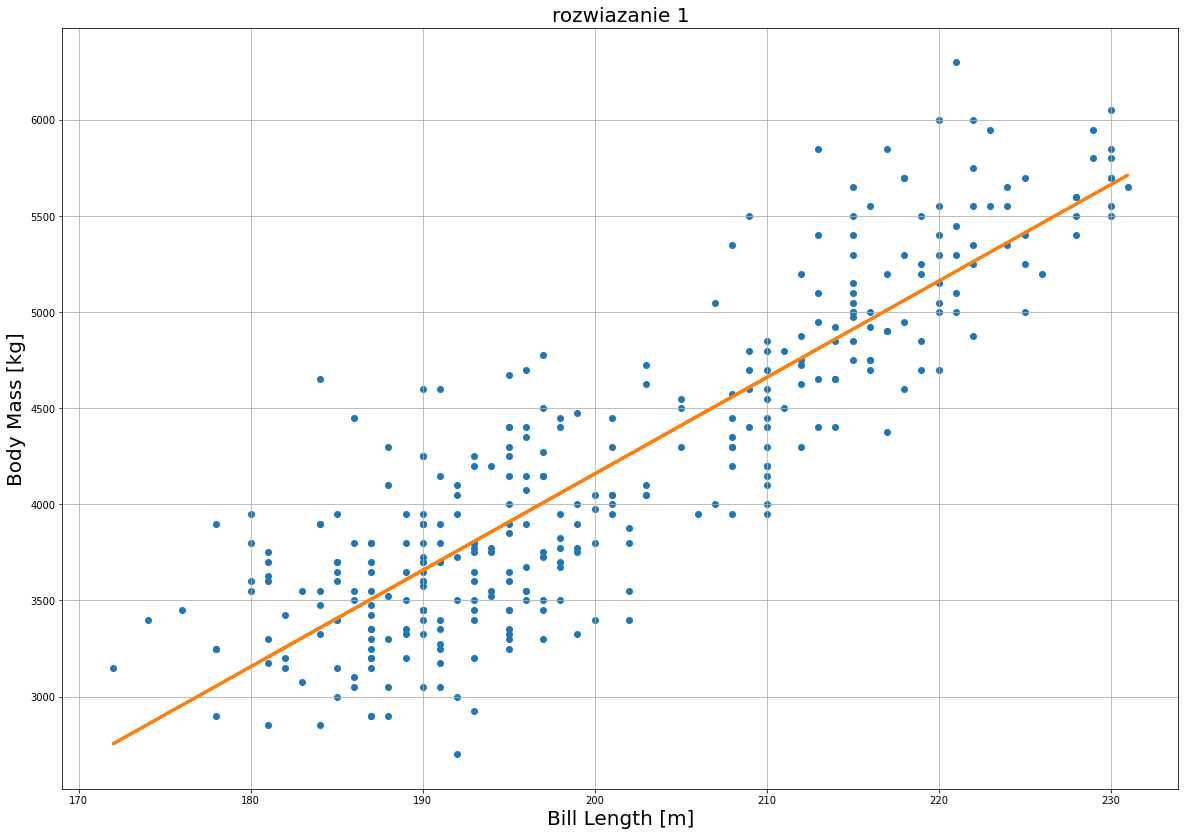

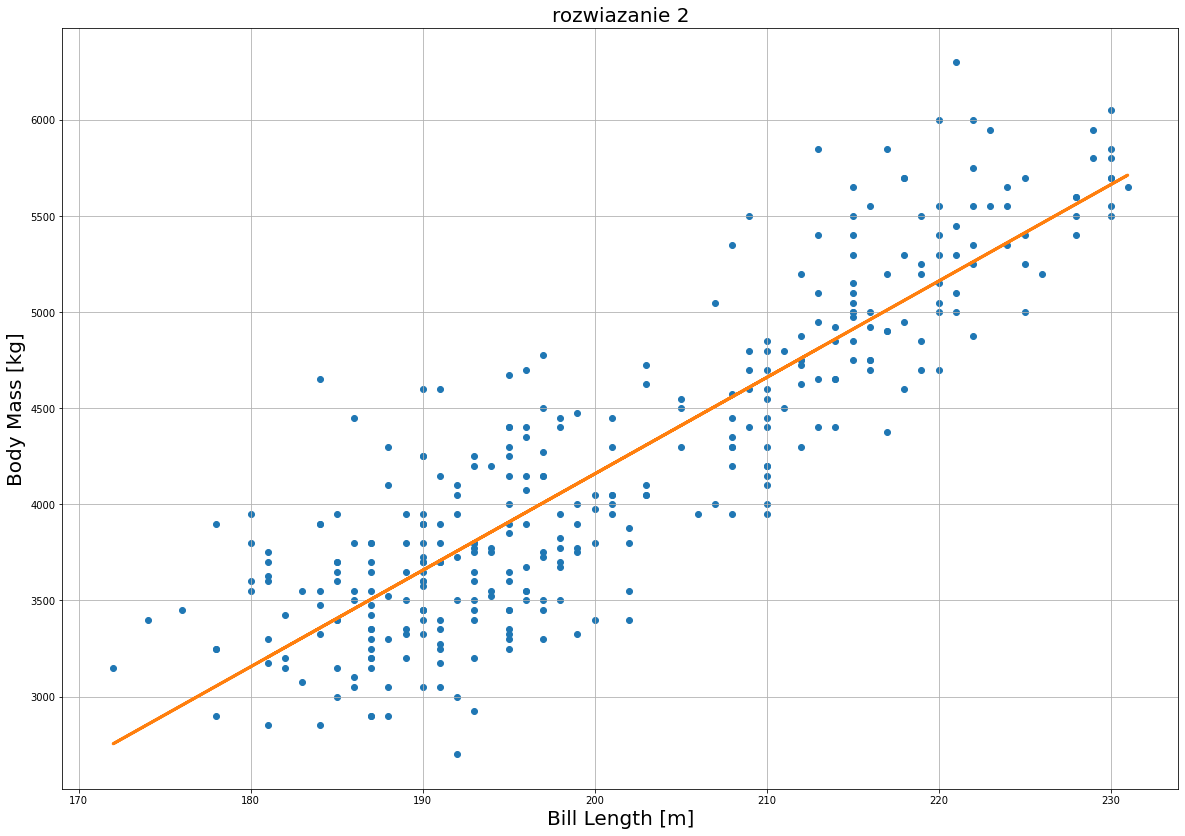

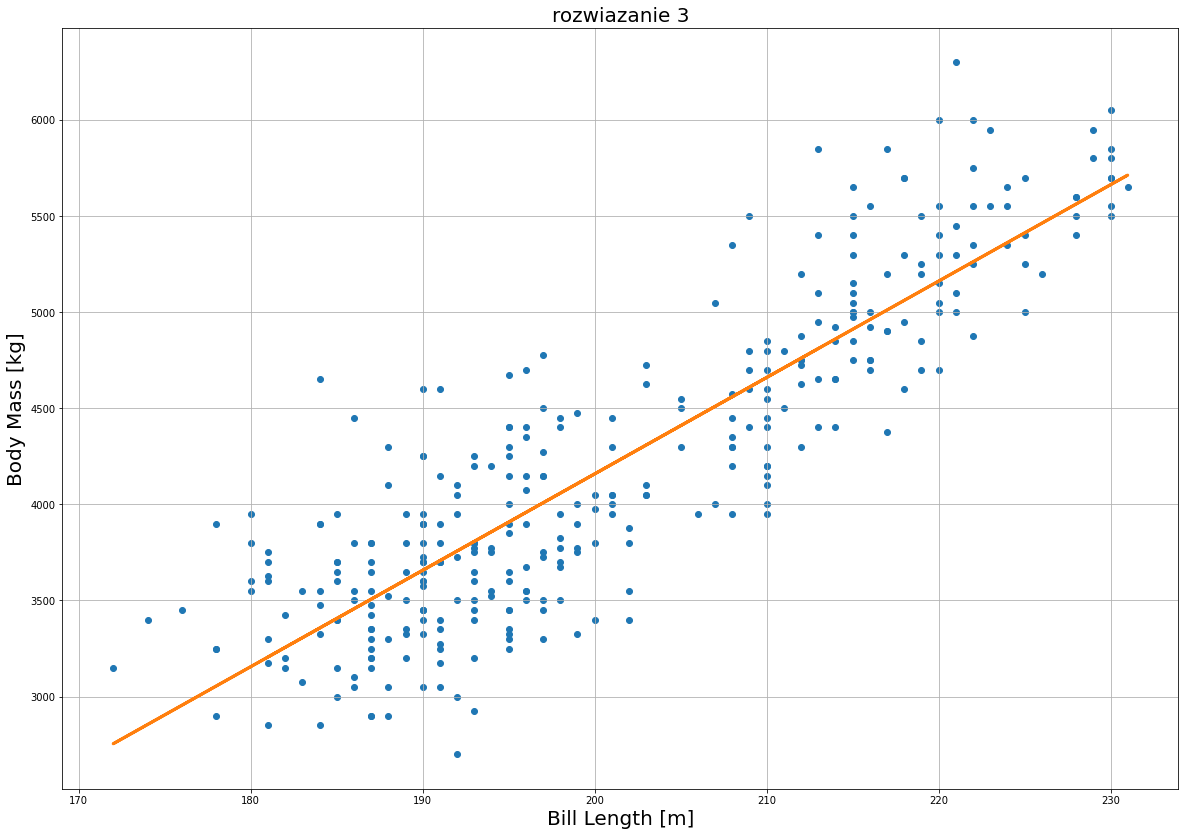

In [38]:
for i,rozwiazanie in enumerate([x_opt_1,x_opt_2,x_opt_3]):
    showRegressionLine(rozwiazanie,'rozwiazanie '+ str(i+1) )

### Podsumowanie

In [39]:
print(f"Blad sredniokwadratowy otp_1: {MSE_OPT_1}")
print(f"Blad sredniokwadratowy otp_2: {MSE_OPT_2}")
print(f"Blad sredniokwadratowy otp_3: {MSE_OPT_3}")
print(f"Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: {MSE_LIN_WITHOUT_TEST}")
print(f"Blad sredniokwadratowy funkcji kwadratowej bez podzialu na dane testowe i treningowe: {MSE_GLM_WITHOUT_TEST}")
print(f"Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: {MSE_LIN_TEST_80}")
print(f"Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: {MSE_GLM_TEST_80}")

Blad sredniokwadratowy otp_1: 153789.67786691786
Blad sredniokwadratowy otp_2: 153789.67786691783
Blad sredniokwadratowy otp_3: 153789.67786691783
Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: 153789.6779
Blad sredniokwadratowy funkcji kwadratowej bez podzialu na dane testowe i treningowe: 143462.2075
Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: 184528.2615
Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: 172527.1824


Metoda optymalizacji niewiele sie rozni od wbudowanej numerycznej metody aproksymacji liniowej pod wzgledem otrzymanych wynikow.
Są one niewiele lepsze od metody aproksymacji liniowej i we wszystkich testach blad sredniokwadratowy jest prawie identyczny i mniejszy od poprzednich. Najmniej prob jest przy srednim i najwiekszym doborze liczb losowych. 

# 5. Estymacja (dopasowanie rozkładów do danych rzeczywistych)

Na poczatku przy wsteonej analizie, udalo mi sie zauwazyc ciekawy rozklad masy pingwinow, na calym zbiorze nie bylo tego tak wyraznie widac ale po podziale na dwie grupy, samcow i samice, podzial wydawal sie znaczny.

In [40]:
feature = 'body_mass_g'
X = all_of_data[feature].values
X_Male = X[all_of_data['sex']=='Male']
X_Female = X[all_of_data['sex']=='Female']

### Wstęp do testów
testy na normalność są nam potrzebne aby określić czy wyniki mają rozkład normalny. Hipotezy dla testów:
- H0: Nie mamy podstaw aby odrzucić, że nasz rozkład jest normalny.
- H1: Mamy podstawy by twierdzić, że nasz rozkład odbiega od krzywej Gaussa.
  
Poziom istotnosci statystycznej dla naszego przykładu możemy okreslic jako alfa=0,05
Wyniki naszych testów możemy zbadać pod kątem tej hipotezy.

### Testy na normalnosc

In [41]:
from scipy import stats

print(f'Cały zbiór              | test Shapiro, p-wartość = {stats.shapiro(X)[1]}')
print(f'Podzbiór samice         | test Shapiro, p-wartość = {stats.shapiro(X_Female)[1]}')
print(f'Podzbiór samce          | test Shapiro, p-wartość = {stats.shapiro(X_Male)[1]}')
print(f'Cały zbiór              | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X)[1]}\n')
print(f'Podzbior samice         | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X_Male)[1]}\n')
print(f'Cały samce              | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X)[1]}\n')

Cały zbiór              | test Shapiro, p-wartość = 3.566622908124373e-08
Podzbiór samice         | test Shapiro, p-wartość = 6.155244847150243e-08
Podzbiór samce          | test Shapiro, p-wartość = 1.2268027660411462e-07
Cały zbiór              | test D’Agostino i Pearsona, p-wartość = 2.425393872805478e-07

Podzbior samice         | test D’Agostino i Pearsona, p-wartość = 1.4334235109593603e-17

Cały samce              | test D’Agostino i Pearsona, p-wartość = 2.425393872805478e-07



Po dwoch testach Shapiro, D'Agostiono, widac ze, nasza p-wartość jest duuuuużo mniejsza niż nasza alfa co oznacza, że musimy odrzucić hipotezę H0 i przyjąć H1.
Mamy solidne podstawy aby twierdzić, że nasz rozkład nie jest rozkładem normalnym. 

### Wizualizacja rozkladu

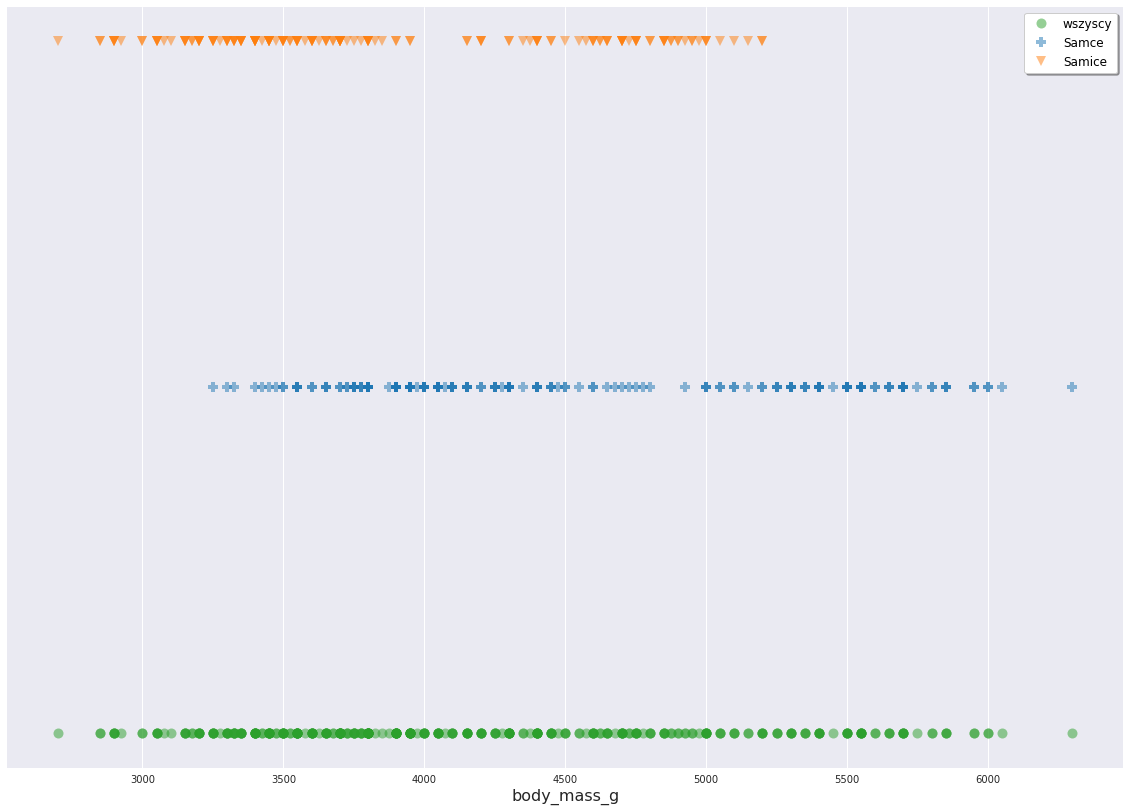

In [42]:
ax_x = np.linspace(X.min(), X.max(), num=300)

with plt.style.context('seaborn'):  
    plt.figure(figsize=(20,14))
    plt.plot(X, np.zeros_like(X), 'o', 
             markersize=10, alpha=0.5, markerfacecolor='tab:green', markeredgecolor='tab:green', 
             label='wszyscy')

    plt.plot(X_Male, np.ones_like(X_Male), 'P', 
             markersize=10, alpha=0.5, markerfacecolor='tab:blue', markeredgecolor='tab:blue', 
             label='Samce')

    plt.plot(X_Female, 2*np.ones_like(X_Female), 'v', 
             markersize=10, alpha=0.5, markerfacecolor='tab:orange', markeredgecolor='tab:orange', 
             label='Samice')

    plt.xlabel(feature, fontsize=16)
    plt.yticks([])
plt.legend(shadow=True, fontsize=12)
plt.show()

Przy samcach i samicach widac ze wyznaczja sie dwie klastry osobnikow o wiekszym skupieniu. Nasze odrzucenie H0 było prawidlowe,
rozklady nie sa normalne. Nalezy zatem zastosowac estymator Parzena

### Estymator Parzena

In [43]:
def K(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)

Funkcja jadra

### Wizualizacja

Wszystkie pingwiny

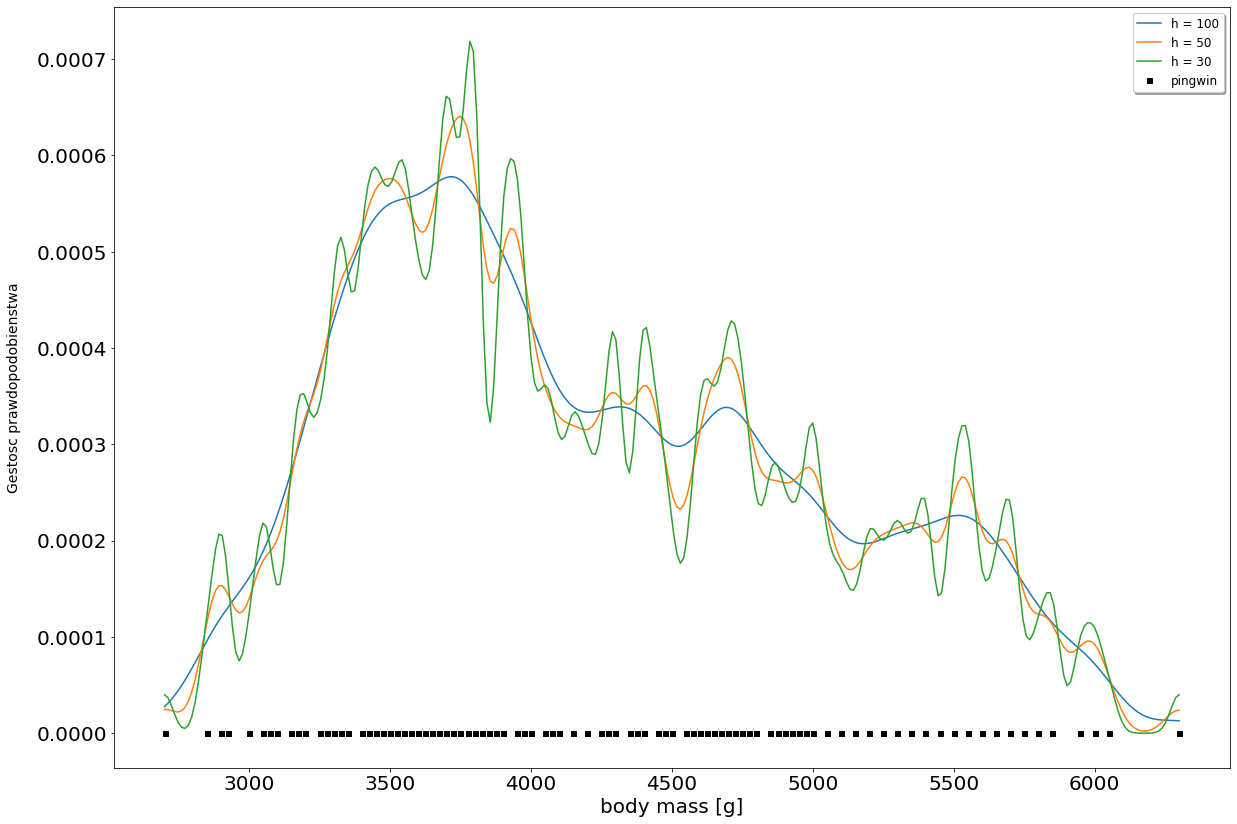

In [44]:
H = [100, 50, 30]
N = X.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X):
    suma += K((ax_x-pomiar)/h)

  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X, np.zeros_like(X) , 's', markersize=5, color='black', label='pingwin')

plt.ylabel('Gestosc prawdopodobienstwa', fontsize=14, labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body mass [g]", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Samce

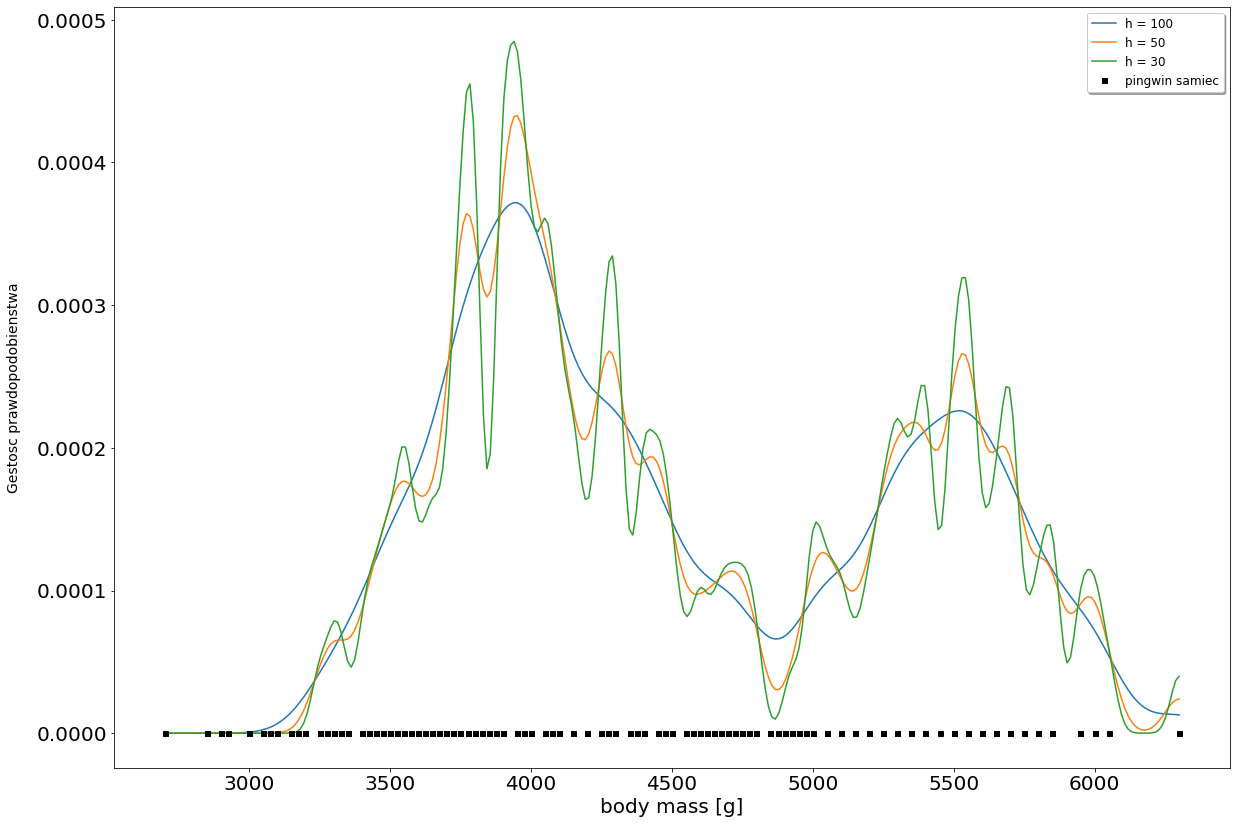

In [45]:
H = [100, 50, 30]
N = X.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X_Male):
    suma += K((ax_x-pomiar)/h)

  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X, np.zeros_like(X) , 's', markersize=5, color='black', label='pingwin samiec')

plt.ylabel('Gestosc prawdopodobienstwa', fontsize=14, labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body mass [g]", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Samice

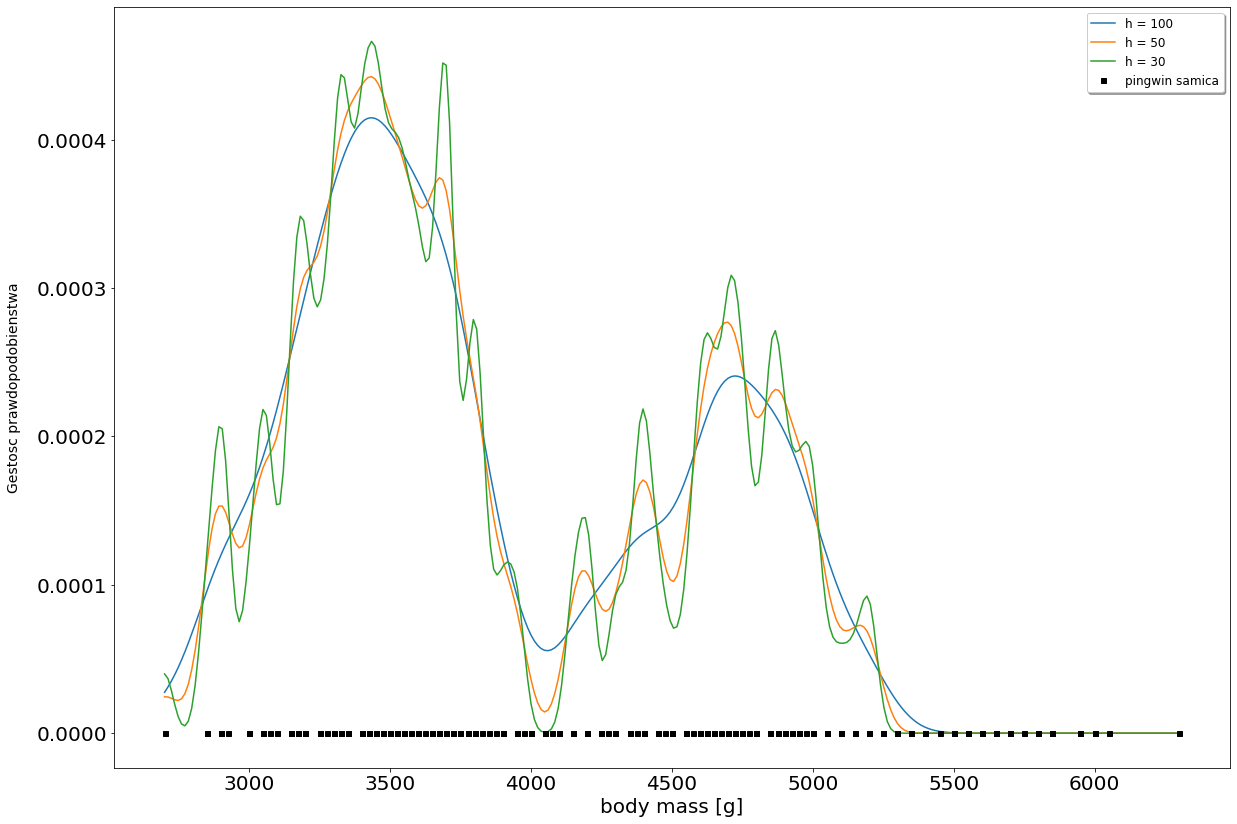

In [46]:
H = [100, 50, 30]
N = X.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X_Female):
    suma += K((ax_x-pomiar)/h)

  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X, np.zeros_like(X) , 's', markersize=5, color='black', label='pingwin samica')

plt.ylabel('Gestosc prawdopodobienstwa', fontsize=14, labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body mass [g]", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Podsumowanie

Potwierdzily sie zalozenia o stworzeniu sie dwoch wiekszych skupisk mas pingwinow roznych plci. Przy wszystkich nie jest to az tak widoczne jak przy podziale na plcie. Widac, ze w zaleznosci od szerokosci okna **h** wykres sie wygladza lub staje bardziej ostry i podatny na pojedyncze wystapienia. Im **h** jest wieksze, tym wykres jest gladszy i mniej podatny na pojedyncze wystapienia, im **h** jest mniejsze tym wykres jest ostrzy i bardziej wrazliwy na pojedyncze wystapienia.

# 6. Podsumowanie

Dataset pingwinow pomimo swojej malej ilosci danych da sie w uzyteczny sposob wykorzystac. Po wstepnej analizie na wykresach mozna bylo sie dowiedziec co mniej wiecej sprawdzic. Wybralem najciekawsze zaleznosci zeby je sprawdzic i opisac.  